In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn import preprocessing
 


In [2]:
am=pd.read_excel(r"C:\Users\Lenovo\Desktop\Final_Data.xlsx")

In [3]:
am.head()

,Twitter handler,Amazon seller name,Rating score,Nu of amazon review,Nu of tweet,# Marketing,# Conversation,AVG_tw_Polarity
0,JaamsoRoyals_,JAAMSO ROYALS,85.140562,140,1,1,0,0.500000
1,exoticindiaart,Exotic India (322),95.473251,110,5858,5802,56,0.168658
2,volga10000,VOLGA ENTERPRISES (181),93.333333,56,2,2,0,0.000000
3,paperplane_shop,Paper Plane Design (241),81.875000,240,1296,1044,252,0.263103
4,TheLightStudio,TheLightStudio,85.714286,50,9,9,0,0.056818


In [37]:
am['# Conversation'].value_counts(ascending=False)

0      15
54      5
2       4
3       3
1       3
24      3
15      2
38      2
56      2
252     2
429     1
503     1
53      1
7       1
8       1
380     1
12      1
14      1
81      1
40      1
402     1
21      1
27      1
30      1
99      1
36      1
246     1
189     1
Name: # Conversation, dtype: int64

In [4]:
from scipy.stats import ttest_1samp
import numpy as np

In [5]:
rating_mean=am['Rating score'].mean()
print(rating_mean)

86.26248893620482


In [25]:
sample=am[am['# Conversation']>=10]

In [26]:
sample_mean=sample['Rating score'].mean()
print(sample_mean)

85.26880392960258


# One Sample t-test

H_0= Mean of rating score of sellers where conversations tweets are less than 10 is equal to /n mean of rating score of all sellers with all tweets

H_1=Mean of rating score of sellers where conversations tweets are less than 10 is  not equal to /n mean of rating score of all sellers with all tweets

In [27]:
tstat,p_val=stats.ttest_1samp(a=sample['Rating score'] ,               # Sample data
                 popmean= am['Rating score'].mean())  # Pop mean
print("p_value", p_val)
print("t_stat",tstat)

p_value 0.6953666533934537
t_stat -0.39524797366895204


In [56]:
if p_val<0.05:
    print('we are able  to reject null hypothesis as ,there is no impact on overall rating score due to engagement with \n customers on twitter')
else:
    print("we are failed to reject null hypothesis as ,there is no impact on overallrating score due to engagement \n with customers on twitter")

we are failed to reject null hypothesis as ,there is no impact on overallrating score due to engagement 
 with customers on twitter


# Upper tail 1 sample t-test

H_0= Mean of rating score of sellers where conversations tweets( are grater than 10) is less than or equal to /n mean of rating score of all sellers with all tweets

H_1=Mean of rating score of sellers where conversations tweets (are greater than 10) is  greater than  /n mean of rating score of all sellers with all tweets

In [29]:
tstat,p_val=stats.ttest_1samp(a=sample['Rating score'] ,               # Sample data
                 popmean= am['Rating score'].mean())  # Pop mean
print("p_value", p_val)
print("t_stat",tstat)

p_value 0.6953666533934537
t_stat -0.39524797366895204


In [30]:
Upper_tail_p_val=1-p_val/2

In [31]:
print(Upper_tail_p_val)

0.6523166733032731


In [55]:
if Upper_tail_p_val<0.05:
    print("we are able to reject H_0")
else:
    print("we are fail to reject  H_0")

we are fail to reject  H_0


In [18]:
am.dtypes

Twitter handler         object
Amazon seller name      object
Rating score           float64
Nu of amazon review      int64
Nu of tweet              int64
# Marketing              int64
# Conversation           int64
AVG_tw_Polarity        float64
dtype: object

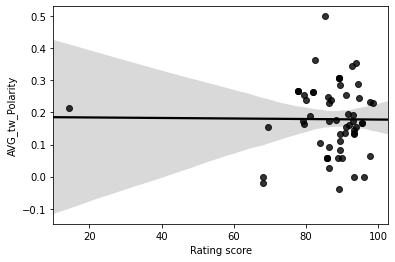

In [19]:
sns.regplot(am['Rating score'], am['AVG_tw_Polarity'],color='black')


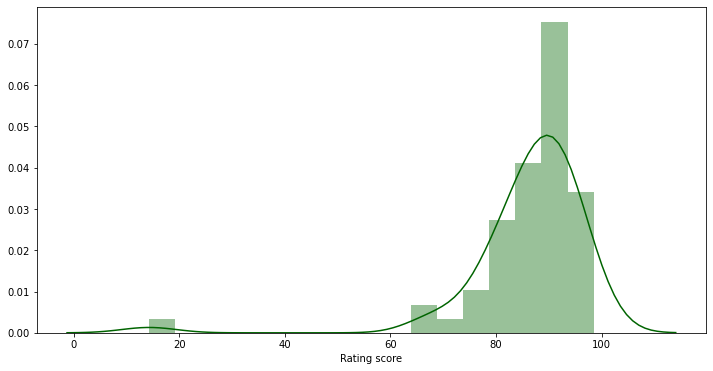

In [20]:
plt.figure(figsize = (12,6))
sns.distplot(am['Rating score'],color = 'darkgreen')

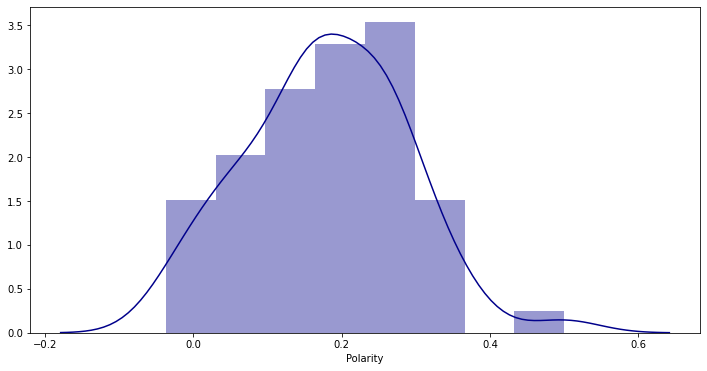

In [25]:
plt.figure(figsize = (12,6))
sns.distplot(am['Polarity'],color = 'darkblue')

In [35]:
sample_1=am['Rating score'].round()
sample_2=am['# Conversation']

stats.ttest_ind(a= am['Rating score'],
                b= am['# Conversation'],
                equal_var=False)  

In [41]:
maj_conv_se=am[am["# Conversation"]>10]
maj_conv_se.shape

(32, 8)

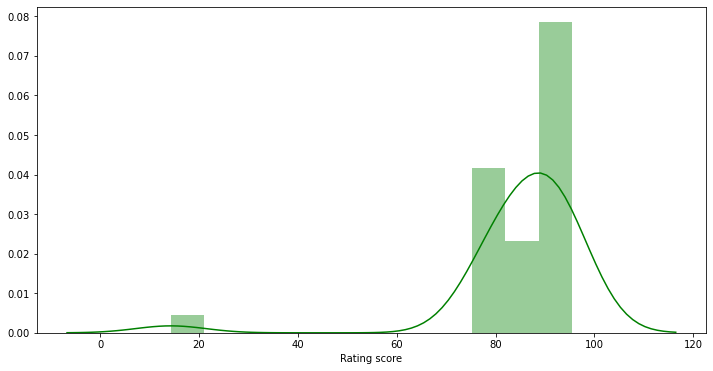

In [24]:
plt.figure(figsize = (12,6))
sns.distplot(maj_conv_se['Rating score'],color = 'green')

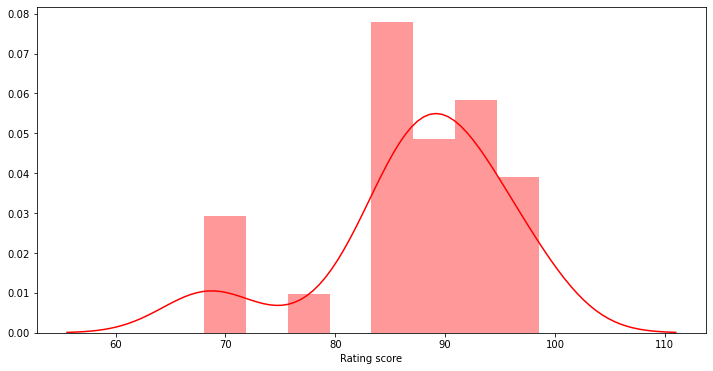

In [46]:
maj_mkt_se=am[am["# Conversation"]<10]
plt.figure(figsize = (12,6))
sns.distplot(maj_mkt_se['Rating score'],color = 'Red')

In [42]:
maj_mkt_se.shape

(27, 8)

In [44]:
maj_mkt_se.sort_values('Rating score',axis=0,ascending=True)

,Twitter handler,Amazon seller name,Rating score,Nu of amazon review,Nu of tweet,# Marketing,# Conversation,AVG_tw_Polarity
10,GadgetsApplnces,Gadgets Appliances (122),68.062201,350,24,24,0,0.000000
38,shopping_swift,Swift Shopping,68.181818,50,35,35,0,-0.020159
11,Cart2India,cart2india,69.409938,240,131,128,3,0.154619
32,Deodap1,DeoDap,79.223301,160,241,240,1,0.173320
5,ledshoppe,Led Shoppee (256),83.695652,50,1077,1074,3,0.104795
0,JaamsoRoyals_,JAAMSO ROYALS,85.140562,140,1,1,0,0.500000
4,TheLightStudio,TheLightStudio,85.714286,50,9,9,0,0.056818
28,TheLightStudio,TheLightStudio,85.714286,50,9,9,0,0.056818
22,TheLightStudio,TheLightStudio,85.714286,50,9,9,0,0.056818
39,vimalclothing,VIMAL CLOTHING,86.237189,185,7,6,1,0.228571


In [45]:
maj_conv_se.sort_values('Rating score',axis=0,ascending=True)

,Twitter handler,Amazon seller name,Rating score,Nu of amazon review,Nu of tweet,# Marketing,# Conversation,AVG_tw_Polarity
47,ShopYourWay,Shop Your World St…,14.285714,50,3183,2754,429,0.214605
7,tiedribbons,TiedRibbons (186),77.833753,390,951,897,54,0.265779
55,tiedribbons,TiedRibbons (186),77.833753,390,951,897,54,0.265779
19,tiedribbons,TiedRibbons (186),77.833753,390,951,897,54,0.265779
27,WhiterayP,WhiteRay,79.292929,55,335,282,53,0.164959
31,nilkamal_ltd,Nilkamal LTD,79.365079,55,1403,1214,189,0.255792
26,Royalparadisegarden,Royal Paradise Garden,80.079681,85,273,235,38,0.237350
49,iBhejo,iBhejo,80.952381,55,1910,1874,36,0.189185
58,paperplane_shop,Paper Plane Design (241),81.875000,240,1296,1044,252,0.263103
3,paperplane_shop,Paper Plane Design (241),81.875000,240,1296,1044,252,0.263103


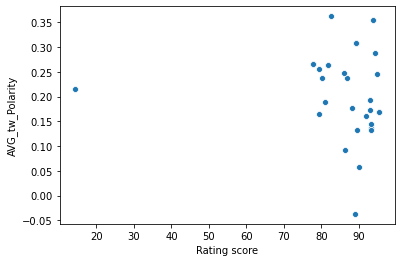

In [51]:
sns.scatterplot(x=maj_conv_se['Rating score'],y=maj_conv_se['AVG_tw_Polarity'])

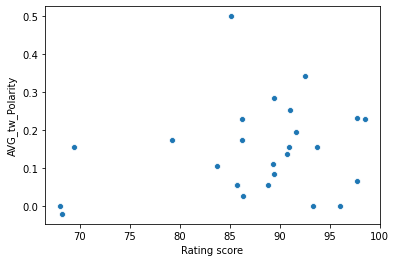

In [52]:
sns.scatterplot(x=maj_mkt_se['Rating score'],y=maj_mkt_se['AVG_tw_Polarity'])

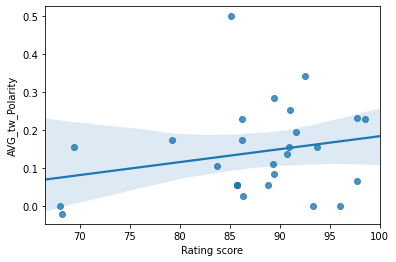

In [53]:
sns.regplot(x=maj_mkt_se['Rating score'],y=maj_mkt_se['AVG_tw_Polarity'])
